In [11]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp


In [4]:
yp_df = pd.read_excel("../data/moving_population/ingu_hour_yeungdeungpo.xlsx",sheet_name=0)

In [10]:
yp_df_10000 = yp_df.head(1000)
yp_df_10000.

,date,hour,longitude,latitude,gu_code,gu_name,dong_code,dong_name,under10_ingu,under20_ingu,...,upper80_male_ingu,under10_female_ingu,under20_female_ingu,under30_female_ingu,under40_female_ingu,under50_female_ingu,under60_female_ingu,under70_female_ingu,under80_female_ingu,upper80_female_ingu
0,20190911,0,126.904651,37.510243,11560,영등포구,1156051500,영등포본동,0.477690,2.295678,...,0.291999,0.291928,0.916024,1.710428,2.440412,3.262780,2.892460,2.045463,1.043423,0.272596
1,20190911,0,126.917051,37.516164,11560,영등포구,1156051500,영등포본동,0.261749,2.162063,...,0.387504,0.149363,0.938860,3.624611,3.544734,2.772231,2.820026,2.407307,1.139865,0.194348
2,20190911,0,126.911425,37.512080,11560,영등포구,1156051500,영등포본동,0.003061,0.223033,...,0.103522,0.003061,0.133585,0.390273,0.417927,0.513422,0.516027,0.547065,0.373192,0.124435
3,20190911,0,126.901812,37.511581,11560,영등포구,1156051500,영등포본동,0.683299,4.209149,...,0.359653,0.265973,1.946447,3.184111,5.404459,4.894257,5.373596,2.858021,1.359324,0.362667
4,20190911,0,126.913667,37.514795,11560,영등포구,1156051500,영등포본동,0.218001,1.505187,...,0.189097,0.141304,0.692433,0.846153,1.329714,1.272188,1.615956,1.570745,0.773648,0.163622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20190911,0,126.935698,37.519409,11560,영등포구,1156054000,여의동,0.115503,0.684045,...,0.144597,0.065516,0.334959,0.425694,0.721789,0.904227,0.848502,0.639603,0.392872,0.240647
996,20190911,0,126.940723,37.528446,11560,영등포구,1156054000,여의동,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000096,0.000000,0.000000,0.000000,0.000000,0.000000
997,20190911,0,126.920844,37.537815,11560,영등포구,1156054000,여의동,0.000000,0.027679,...,0.001941,0.000000,0.018706,0.036925,0.081290,0.076950,0.045649,0.018054,0.014532,0.001097
998,20190911,0,126.924333,37.525663,11560,영등포구,1156054000,여의동,0.014383,0.213163,...,0.000000,0.014383,0.128075,0.399660,0.873229,0.823339,0.628925,0.541176,0.428309,0.019657


In [12]:
profile = pp.ProfileReport(yp_df_10000, title='Pandas Profiling Report', html={'style':{'full_width':True}})

C:\Users\KIMDOHWAN\Anaconda3\envs\dacon\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


C:\Users\KIMDOHWAN\Anaconda3\envs\dacon\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\KIMDOHWAN\Anaconda3\envs\dacon\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [34]:
ingu_var = [x for x in yp_df.columns if '_ingu' in x]
print(len(ingu_var))

27


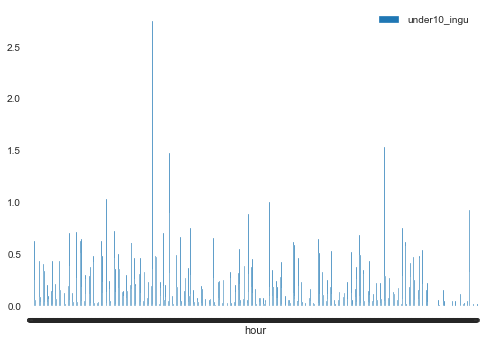

In [17]:
# yp_df_10000['under10_ingu'].plot()
yp_df_10000.plot(kind='bar',x='hour',y='under10_ingu')
plt.show()

In [23]:
yp_df_10000['dong_name'].unique()

array(['영등포본동', '영등포동', '여의동'], dtype=object)

In [36]:
yp_df_10000_clean = pd.melt(yp_df_10000,['hour','gu_name','dong_name'],value_vars=ingu_var,var_name='성별연령대',value_name='인구')
yp_df_10000_clean['연령대'] = yp_df_10000_clean['성별연령대'].str.slice(stop=7)
yp_df_10000_clean['성별'] = yp_df_10000_clean['성별연령대'].str.slice(start=8)
yp_df_10000_clean

,hour,gu_name,dong_name,성별연령대,인구,연령대,성별
0,0,영등포구,영등포본동,under10_ingu,0.477690,under10,ingu
1,0,영등포구,영등포본동,under10_ingu,0.261749,under10,ingu
2,0,영등포구,영등포본동,under10_ingu,0.003061,under10,ingu
3,0,영등포구,영등포본동,under10_ingu,0.683299,under10,ingu
4,0,영등포구,영등포본동,under10_ingu,0.218001,under10,ingu
...,...,...,...,...,...,...,...
26995,0,영등포구,여의동,upper80_female_ingu,0.240647,upper80,female_ingu
26996,0,영등포구,여의동,upper80_female_ingu,0.000000,upper80,female_ingu
26997,0,영등포구,여의동,upper80_female_ingu,0.001097,upper80,female_ingu
26998,0,영등포구,여의동,upper80_female_ingu,0.019657,upper80,female_ingu


In [46]:
yp_df_10000_clean['성별'] = yp_df_10000_clean['성별'].apply(lambda x:'total' if x=='ingu' e)
yp_df_10000_clean['성별']

0          ingu
1          ingu
2          ingu
3          ingu
4          ingu
          ...  
26995    female
26996    female
26997    female
26998    female
26999    female
Name: 성별, Length: 27000, dtype: object

In [ ]:
mapo_df = pd.read_excel("../data/moving_population/ingu_hour_mapo.xlsx",sheet_name=0)

In [12]:
df = pd.concat([yp_df, mapo_df])
print("Column headings:")
print(df.columns)
print(df.columns)

Column headings:
Index(['date', 'hour', 'longitude', 'latitude', 'gu_code', 'gu_name',
       'dong_code', 'dong_name', 'under10_ingu', 'under20_ingu',
       'under30_ingu', 'under40_ingu', 'under50_ingu', 'under60_ingu',
       'under70_ingu', 'under80_ingu', 'upper80_ingu', 'under10_male_ingu',
       'under20_male_ingu', 'under30_male_ingu', 'under40_male_ingu',
       'under50_male_ingu', 'under60_male_ingu', 'under70_male_ingu',
       'under80_male_ingu', 'upper80_male_ingu', 'under10_female_ingu',
       'under20_female_ingu', 'under30_female_ingu', 'under40_female_ingu',
       'under50_female_ingu', 'under60_female_ingu', 'under70_female_ingu',
       'under80_female_ingu', 'upper80_female_ingu'],
      dtype='object')
Index(['date', 'hour', 'longitude', 'latitude', 'gu_code', 'gu_name',
       'dong_code', 'dong_name', 'under10_ingu', 'under20_ingu',
       'under30_ingu', 'under40_ingu', 'under50_ingu', 'under60_ingu',
       'under70_ingu', 'under80_ingu', 'upper80_ingu', 

In [15]:
info['under80_ingu']

0         2.039465
1         2.818753
2         0.729360
3         2.972929
4         1.621038
5         3.696146
6         1.459867
7         4.050965
8         0.690941
9         2.748141
10        1.611013
11        1.483147
12        0.529442
13        1.363903
14        0.300597
15        0.581599
16        0.748841
17        2.529473
18        2.100494
19        0.589867
20        0.440920
21        0.642770
22        0.647057
23        2.345369
24        3.089817
25        0.638893
26        1.219475
27        2.878496
28        2.672629
29        0.291874
            ...   
211396    2.649142
211397    1.453178
211398    2.679471
211399    2.117583
211400    0.264328
211401    1.816424
211402    0.801409
211403    1.475979
211404    2.598006
211405    3.468964
211406    2.944390
211407    2.570824
211408    2.472064
211409    1.357797
211410    0.518996
211411    0.616811
211412    2.321954
211413    0.763233
211414    1.487381
211415    1.338114
211416    1.326214
211417    3.

In [20]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211426 entries, 0 to 211425
Data columns (total 35 columns):
date                   211426 non-null int64
hour                   211426 non-null int64
longitude              211426 non-null float64
latitude               211426 non-null float64
gu_code                211426 non-null int64
gu_name                211426 non-null object
dong_code              211426 non-null int64
dong_name              211426 non-null object
under10_ingu           211426 non-null float64
under20_ingu           211426 non-null float64
under30_ingu           211426 non-null float64
under40_ingu           211426 non-null float64
under50_ingu           211426 non-null float64
under60_ingu           211426 non-null float64
under70_ingu           211426 non-null float64
under80_ingu           211426 non-null float64
upper80_ingu           211426 non-null float64
under10_male_ingu      211426 non-null float64
under20_male_ingu      211426 non-null float64
under3

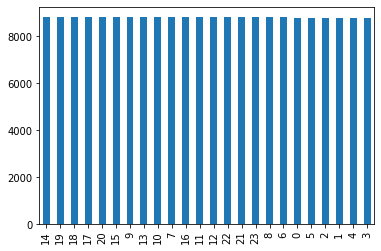

In [25]:
info['hour'].value_counts().plot(kind='bar')

In [24]:
plt.show()

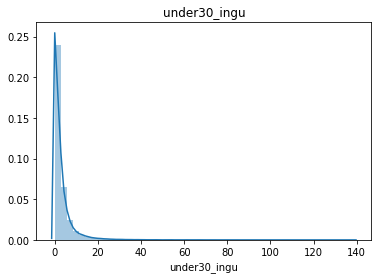

In [29]:
sns.distplot(info.loc[info['under30_ingu'].notnull(), 'under30_ingu'])
plt.title('under30_ingu')
plt.show()


In [34]:
profile = pp.ProfileReport(info, title='Pandas Profiling Report', html={'style':{'full_width':True}})

OptionError: "No such keys(s): 'compute.use_numexpr'"